# Aula 22 - Introdução a Lógica Difusa

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# funções de pertinência

## triangular
def trimf(x, a, b, c):
  x = np.asarray(x, dtype=float)
  esquerda= (x - a)/ (b - a + 1e-10)
  direita = (c - x)/ ( c-b + 1e-10)
  return np.maximum( 0, np.minimum(esquerda,direita))

## trapezoidal
def trapmf(x, a, b, c, d):
  x = np.asarray(x, dtype=float)

# 1 constante em zero
#  2 constante em 1
# 3

  subida = (x - a)/ (b - a + 1e-10) # coeficiente angular 1/(b-a)
# 4

  descida = (d - x)/ (d - c + 1e-10) # coeficiente angular -1/(d-c)

  return np.maximum( 0 ,  np.minimum(    np.minimum(  subida , descida )   ,   1)   )

def plot_mf(universo, mfs: dict, title="Funções de pertinencia"):
  plt.figure(figsize=(6,3))
  for name, mf in mfs.items():
    plt.plot(universo, mf, label=name)

  plt.ylim(-0.05, 1.05)
  plt.title(title)
  plt.xlabel("Universo")
  plt.ylabel("μ")
  plt.legend()
  plt.grid(alpha=0.25)
  plt.show()

def centroid(x, mu):
  x= np.asarray(x, dtype=float)
  mu= np.asarray(mu, dtype=float)

  num = np.trapezoid(x*mu, x)

  den= np.trapezoid(mu, x)
  return num/den




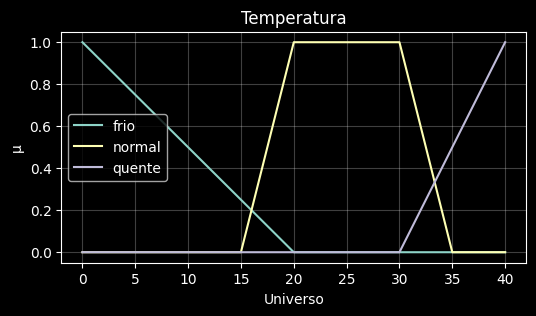

In [2]:

#universo de discurso
T = np.linspace(0,40,401)

#funções de pertinência
mfs_T = {
    'frio': trimf(T, -10, 00, 20),
    'normal': trapmf(T, 15, 20, 30, 35),
    'quente': trimf(T, 30, 40, 46)
}

plot_mf(T, mfs_T, "Temperatura")

In [3]:
Tx=32
# grau de pertinência de Tx
mu = {k: np.interp(Tx, T, v) for k, v in mfs_T.items()}
mu

{'frio': np.float64(0.0),
 'normal': np.float64(0.599999999988),
 'quente': np.float64(0.199999999998)}

Se setiver quente -> potência alta
se estiver normal -> potência media
se estiver frio -> baixa




In [4]:
#força de resposta
disparo = {         # para 39
    'baixa': mu['frio'],  # 0
    'média': mu['normal'], # 0
    'alta': mu['quente']  # .9
}

const = {"baixa": 20, "média": 50, "alta": 100}

forca = sum([const[k] * v for k, v in disparo.items()])

forca

np.float64(49.9999999992)

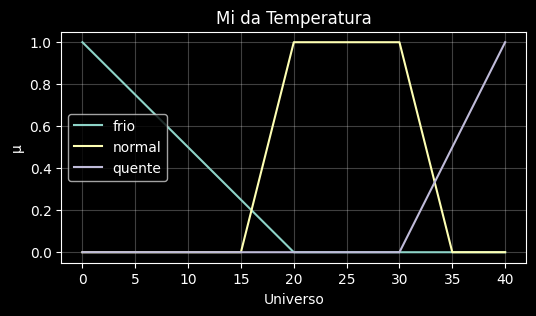

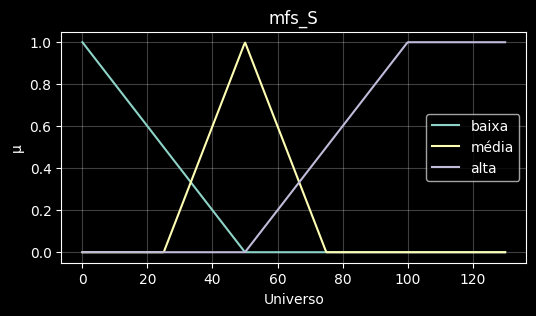

{'frio': np.float64(0.14999999999925),
 'normal': np.float64(0.399999999992),
 'quente': np.float64(0.0)}

In [5]:
# universo da resposta
S = np.linspace(0,130,401)

mfs_S = {       # const = {"baixa": 20, "média": 50, "alta": 100}
    'baixa': trimf(S, -10, 0, 50),
    'média': trimf(S, 25, 50, 75),
    'alta': trapmf(S, 50, 100, 151, 200)
}
plot_mf(T, mfs_T, "Mi da Temperatura")
plot_mf(S, mfs_S, "mfs_S")

T0 = 17
mu = {k: np.interp(T0, T, v) for k, v in mfs_T.items()}
mu

{'frio': np.float64(0.0), 'normal': np.float64(0.0), 'quente': np.float64(0.9999999999833333)}
100.60625662915679


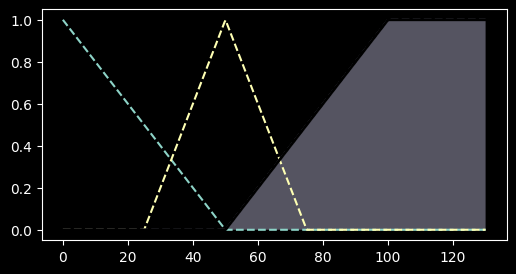

In [6]:
T0 = 40
mu = {k: np.interp(T0, T, v) for k, v in mfs_T.items()}
print(mu)
alpha_baixa = mu['frio']
alpha_média = mu['normal']
alpha_alta = mu['quente']

# regiao da resposta limitada pela pertinencia mfs_T
clipped_baixa = np.minimum(mu['frio'], mfs_S['baixa'])
clipped_média = np.minimum(mu['normal'], mfs_S['média'])
clipped_alta = np.minimum( mu['quente'], mfs_S['alta'])

# limite superior do agregado das regiões
agg = np.maximum(  np.maximum(clipped_baixa, clipped_média),   clipped_alta)

plt.figure(figsize=(6,3))
plt.plot(S, mfs_S['baixa'],'--', label="baixa")
plt.plot(S, mfs_S['média'],'--', label="média")
plt.plot(S, mfs_S['alta'],'--', label="alta")

plt.fill_between(S, clipped_baixa,  alpha=0.45)
plt.fill_between(S, clipped_média,  alpha=0.45)
plt.fill_between(S, clipped_alta,  alpha=0.45)

plt.plot(S, agg, 'k' , lw=2, label="agg")


print(centroid(S, agg))

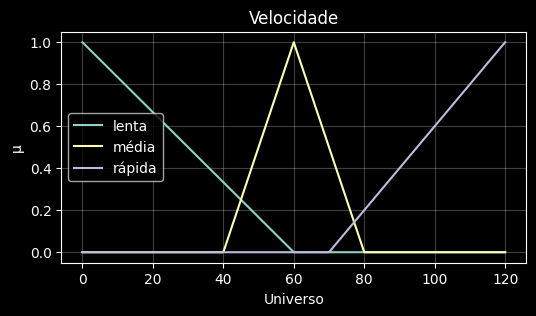

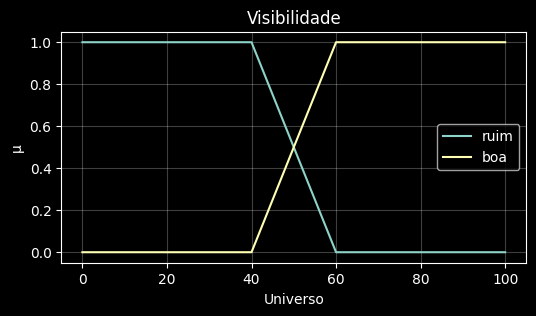

In [7]:

velocidade = np.linspace(0,120,401)

visibilidade = np.linspace(0,100,401)

risco = np.linspace(0,100,401)

mfs_vel = {
    'lenta': trimf(velocidade, -10, 0, 60),
    'média': trimf(velocidade, 40, 60, 80),
    'rápida': trimf(velocidade, 70, 120, 140)
}

mfs_vis = {"ruim": trapmf(visibilidade, -10, -5, 40, 60),
           "boa": trapmf(visibilidade, 40,60,120,120 )}

plot_mf(velocidade, mfs_vel, "Velocidade")
plot_mf(visibilidade, mfs_vis, "Visibilidade")

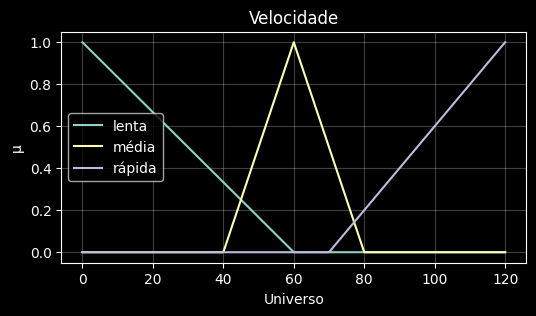

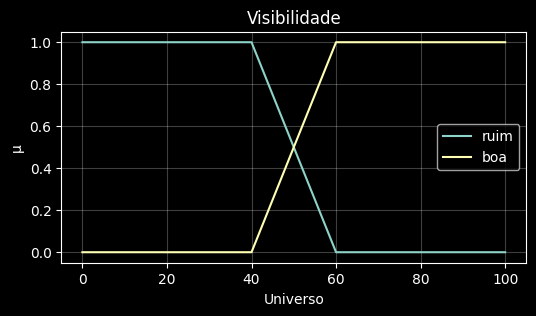

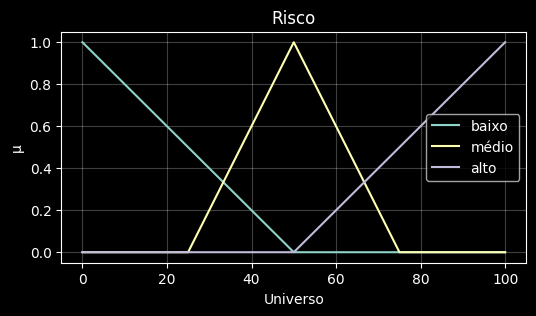

In [8]:
mfs_risco = {"baixo": trimf(risco, -1, 0, 50 ),
             "médio": trimf(risco, 25,50,75),
             "alto": trimf(risco, 50, 100, 101)}
plot_mf(velocidade, mfs_vel, "Velocidade")
plot_mf(visibilidade, mfs_vis, "Visibilidade")
plot_mf(risco, mfs_risco, "Risco")



In [9]:
v0 = 75
vis0=50

mu_v = {k: np.interp(v0, velocidade, v) for k, v in mfs_vel.items()}
mu_vis = {k: np.interp(vis0, visibilidade, v) for k, v in mfs_vis.items()}

print(mu_v)
print(mu_vis)

{'lenta': np.float64(0.0), 'média': np.float64(0.24999999999875003), 'rápida': np.float64(0.0999999999998)}
{'ruim': np.float64(0.49999999999750006), 'boa': np.float64(0.49999999999750006)}


In [10]:
alpha0 = min(mu_v['rápida'], mu_vis['boa'])
alpha1 = min(mu_v['rápida'], mu_vis['ruim'])
alpha2 = min(mu_v['média'], mu_vis['boa'])
print(alpha0)
print(alpha1)
print(alpha2)

0.0999999999998
0.0999999999998
0.24999999999875003


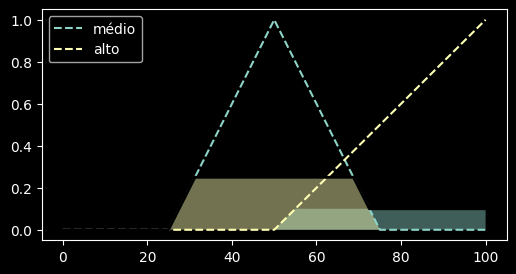

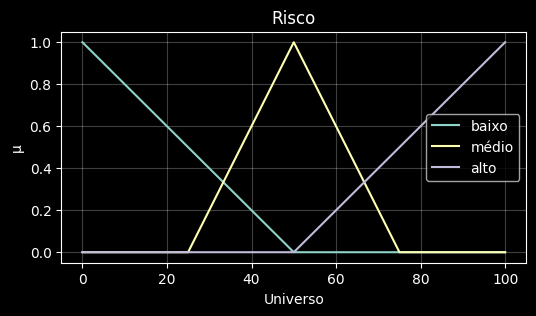

57.135253456238


In [11]:
clipped_r_alto = np.minimum(mfs_risco['alto'], alpha1)
clipped_r_médio = np.minimum(mfs_risco['médio'], alpha2)

plt.figure(figsize=(6,3))
plt.ylim(-0.05,1.05);
plt.fill_between(risco, 0, clipped_r_alto, alpha=0.45)
plt.fill_between(risco, 0, clipped_r_médio, alpha=0.45)
plt.plot(risco, mfs_risco['médio'],'--', label="médio")
plt.plot(risco, mfs_risco['alto'],'--', label="alto")
plt.legend()


agg =np.maximum(clipped_r_alto, clipped_r_médio)

plt.plot(risco, agg, 'k' , lw=2, label="agg")
plot_mf(risco, mfs_risco, "Risco")

print(centroid(risco, agg) )

In [12]:
!pip -q install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ModuleNotFoundError: No module named 'networkx'

In [ ]:
renda = ctrl.Antecedent(np.arange(0, 100001, 1) ,'renda')
risco = ctrl.Consequent(np.arange(0, 100, 1), 'risco')

renda['baixo'] = fuzz.trimf(renda.universe, [0, 0, 60002])

renda['alto'] = fuzz.trimf(renda.universe, [40000, 100000, 100000])

risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 50])
risco['alto'] = fuzz.trimf(risco.universe, [50, 100, 100])


regrariscoalto = ctrl.Rule(renda['baixo'], risco['alto'])

regrariscobaixo = ctrl.Rule(renda['alto'], risco['baixo'])

risco_ctrl = ctrl.ControlSystem([regrariscoalto, regrariscobaixo])

risco_sim = ctrl.ControlSystemSimulation(risco_ctrl)

risco_sim.input['renda'] = 40000
risco_sim.compute()

print(risco_sim.output['risco'])


78.38229421999641
